In [0]:

from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
root_dir = "/content/drive/My Drive/Polygence/Audrey/"

In [0]:
import json
import nltk
import numpy as np
import pandas as pd
import glob

In [0]:
% matplotlib inline
import matplotlib.pyplot as plt

In [0]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [0]:
candidates = open(root_dir + "data/candidate_names.txt", "r").read().splitlines() + ["Michael Bloomberg"]
sources = open(root_dir + "data/source_names.txt", "r").read().splitlines()

### Aggregate all articles for each source

In [0]:
def save_articles_for_source(source):
  urls = set()
  lines = []
  for c in candidates:
    try:
      with open(root_dir + "data/full_articles/%s_%s.json" % (c, source), "r") as f:
        for line in f:
          a = json.loads(line)
          url = a["url"]
          if url in urls:
            continue
          urls.add(url)
          lines.append(a)
    except:
      continue
  with open(root_dir + "data/combined_articles/%s.json" % source, "w") as f:
    for line in lines:
      f.write(json.dumps(line) + "\n")
  print("%d articles for %s" % (len(lines), source))

In [0]:
for s in sources:
  save_articles_for_source(s)

415 articles for abc-news
131 articles for al-jazeera-english
856 articles for associated-press
28 articles for axios
1419 articles for breitbart-news
764 articles for cbs-news
480 articles for cnn
1474 articles for fox-news
11 articles for google-news
103 articles for msnbc
263 articles for national-review
588 articles for nbc-news
747 articles for newsweek
317 articles for new-york-magazine
1087 articles for politico
0 articles for reddit-r-all
574 articles for reuters
42 articles for the-american-conservative
1355 articles for the-hill
0 articles for the-huffington-post
456 articles for the-new-york-times
697 articles for the-washington-post
9 articles for the-washington-times
186 articles for time
463 articles for usa-today
152 articles for vice-news


In [0]:
lines = []
for s in sources:
  print(s)
  with open(root_dir + "data/combined_articles/%s.json" % s, "r") as f:
    for line in f:
      a = json.loads(line)
      lines.append(a)

abc-news
al-jazeera-english
associated-press
axios
breitbart-news
cbs-news
cnn
fox-news
google-news
msnbc
national-review
nbc-news
newsweek
new-york-magazine
politico
reddit-r-all
reuters
the-american-conservative
the-hill
the-huffington-post
the-new-york-times
the-washington-post
the-washington-times
time
usa-today
vice-news


In [0]:
len(lines)

12617

In [0]:
type(lines[0])

dict

In [0]:
df = pd.DataFrame(lines)
df.to_csv(root_dir + "data/all_articles.csv")
df

,source,author,title,url,publishedAt,content
0,abc-news,John Verhovek,5 takeaways from the 2nd night of the Democrat...,https://abcnews.go.com/Politics/takeaways-2nd-...,2019-08-01T03:31:25Z,\nEven before all the candidates took the stag...
1,abc-news,ABC NEWS,Fact-checking Democratic candidates on the iss...,https://abcnews.go.com/Politics/democratic-deb...,2019-08-01T01:29:38Z,\nHere's ABC News' fact check of the second of...
2,abc-news,Kendall Karson and Elizabeth Thomas,What to expect from 2nd night of Democratic de...,https://abcnews.go.com/Politics/democratic-deb...,2019-07-31T20:01:36Z,\nAfter Sens. Bernie Sanders and Elizabeth War...
3,abc-news,Soo Rin Kim,2020 candidates spend millions on online ads a...,https://abcnews.go.com/Politics/love-hate-rela...,2019-07-27T10:22:00Z,\nDemocrats vying for presidential election in...
4,abc-news,Rick Klein and MaryAlice Parks,The Note: Blue wave continues ride through Ken...,https://abcnews.go.com/Politics/note-blue-wave...,2019-11-06T11:05:10Z,\nThe TAKE with Rick Klein\n \nIt might just b...
...,...,...,...,...,...,...
12612,vice-news,"VICE Staff, Leslie Horn",Watch Eddie Murphy Bring His Best Characters B...,https://www.vice.com/en_us/article/qjd4gx/watc...,2019-12-22T18:15:51Z,screenshot via NBC The latest season of Saturd...
12613,vice-news,"Anne Gaviola, Natasha Grzincic, Josh Visser",The Best Way to Manage Your Money Isn’t What Y...,https://www.vice.com/en_us/article/m7qaxb/the-...,2020-01-06T16:17:49Z,This article originally appeared on VICE Canad...
12614,vice-news,"Emma Ockerman, VICE News",Marianne Williamson Is Dropping Out of the 202...,https://www.vice.com/en_us/article/y3mdxj/mari...,2020-01-10T18:06:24Z,"Marianne Williamson, the self-help author who ..."
12615,vice-news,"Alex Norcia, Matt Taylor, Kate Lowenstein",Psychedelics Were Already Having a Good Year. ...,https://www.vice.com/en_us/article/m7qqm8/psyc...,2019-12-16T22:17:36Z,Left Image: Photo by Alex Wong/Getty Images. R...


In [0]:
all_articles = " ".join(df["content"])

In [0]:
all_articles[:100]

'\nEven before all the candidates took the stage in Detroit on Wednesday for the second night of the l'

In [0]:
candidate_counts = {}
for c in candidates:
  last = c.split(' ')[-1]
  count = all_articles.count(last)
  candidate_counts[last] = count
  
print(candidate_counts)
  

{'Bennet': 1139, 'Biden': 27829, 'Blasio': 2266, 'Booker': 4807, 'Bullock': 1289, 'Buttigieg': 8060, 'Castro': 2700, 'Delaney': 1302, 'Gabbard': 4504, 'Gillibrand': 1117, 'Harris': 9584, 'Inslee': 642, 'Klobuchar': 2746, 'Messam': 90, 'Moulton': 295, "O'Rourke": 1769, 'Ryan': 1531, 'Sanders': 16689, 'Sestak': 137, 'Steyer': 1798, 'Warren': 20788, 'Williamson': 1308, 'Yang': 2894}


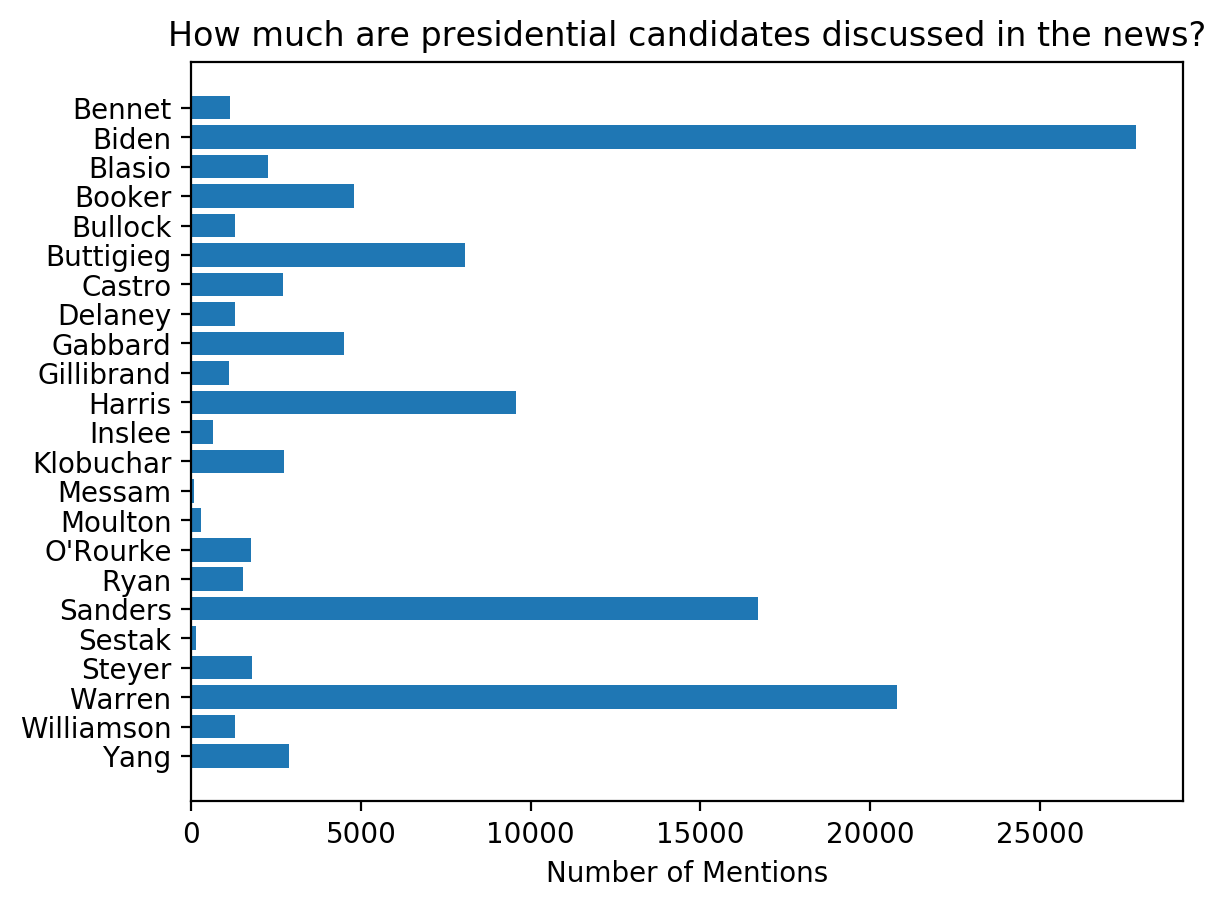

In [0]:
plt.rcdefaults()
fig, ax = plt.subplots(dpi=200)

# Example data
y_pos = np.arange(len(candidate_counts))
counts = list(candidate_counts.values())

ax.barh(y_pos, counts, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(candidate_counts.keys())
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Number of Mentions')
ax.set_title('How much are presidential candidates discussed in the news?')
plt.show()

In [0]:
# Tokenize by sentence

nltk.sent_tokenize(all_articles)[:10]

KeyboardInterrupt: ignored

In [0]:
# Tokenize by word
sent_1 = nltk.sent_tokenize(all_articles)[0]
nltk.word_tokenize(sent_1)

['Those',
 'hoping',
 'for',
 'an',
 'underdog',
 'candidate',
 'to',
 'run',
 'away',
 'with',
 'Tuesday',
 'night',
 '’',
 's',
 'debate',
 'did',
 'not',
 'get',
 'their',
 'wish',
 '.']

### Remove duplicate articles

### Remove special characters

In [0]:
# remove characters like @ # 

### Replace all candidate names with standardized name

In [0]:
d = {
    "Bernie_Sanders": ["Bernie Sanders", "Bernie", "Sanders", "BernieSanders"]
}

### Save all articles for each source

In [0]:
# for all sources, write a json file with each line representing an article